### Scalar(tensor rank:0), Vector(tensor rank:1), matrix(tensor rank:2), tensor(tensor rank > 2)

### Tensorflow not only uses the CPU of the computer but also uses the GPU of the computer. This is crutial for the speed of the algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000 #contains the size of the dataset we want to generate

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,size=(observations,1)) 

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,size=(observations,1)) 

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

# For each project there will be a dataset, perhaps xlsx or csv files. However, tensorflow doesn't work well woth them. Its 
# tansor based thats why it likes tensors. So we want a format which can store information in tensors. One solution to this 
# problem is .npz files. That's numPy's file type. Stores n-dimensional arrays. Tensor can be represented as a multi dimensional
# array. 

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2 # x's and z's
output_size = 1

# When we are employing tensorFlow we must actually BUILD the model
# output = np.dot(inputs,weights) + bias (This is what tf.keras.layers.Dense() Does.)

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

# model.compile(optimizer,loss) configures the model for training
# Epoch is iteration over the full dataset
# verbose = 0, stands for 'silent' 
# verbose = 1, stands for 'progress bar'
# verbose = 2, stands for 'one line per epoch'

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 32.1144 - 686ms/epoch - 21ms/step
Epoch 2/100
32/32 - 0s - loss: 4.4162 - 45ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 1.4619 - 47ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6486 - 46ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4317 - 53ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3668 - 42ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3538 - 47ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3540 - 45ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3515 - 46ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3494 - 45ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3574 - 43ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3419 - 45ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3427 - 44ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3476 - 47ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3399 - 44ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3463 - 41ms/epoch - 1ms/ste

In [5]:
model.layers[0].get_weights()

[array([[ 1.9530628],
        [-2.9979768]], dtype=float32),
 array([5.006087], dtype=float32)]

In [6]:
bias = model.layers[0].get_weights()[1]
bias

array([5.006087], dtype=float32)

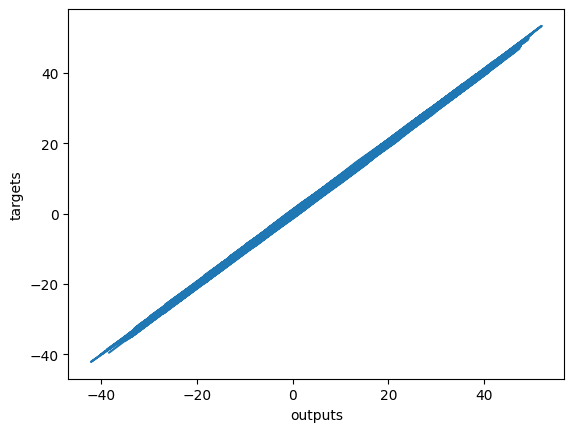

In [7]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()